In [2]:
import pandas as pd
df = pd.read_csv("/content/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("SHAPE-")
df.shape

SHAPE-


(891, 12)

In [5]:
print("INFO-")
df.info()

INFO-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)

In [8]:
df.drop(["Name"], axis=1, inplace=True)

In [9]:
cols=['Sex', 'Ticket', 'Cabin', 'Embarked']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols:
  df[i]=le.fit_transform(df[i])
print(df.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Ticket     Fare  \
0            1         0       3    1  22.0      1      0     523   7.2500   
1            2         1       1    0  38.0      1      0     596  71.2833   
2            3         1       3    0  26.0      0      0     669   7.9250   
3            4         1       1    0  35.0      1      0      49  53.1000   
4            5         0       3    1  35.0      0      0     472   8.0500   

   Cabin  Embarked  
0    147         2  
1     81         0  
2    147         2  
3     55         2  
4    147         2  


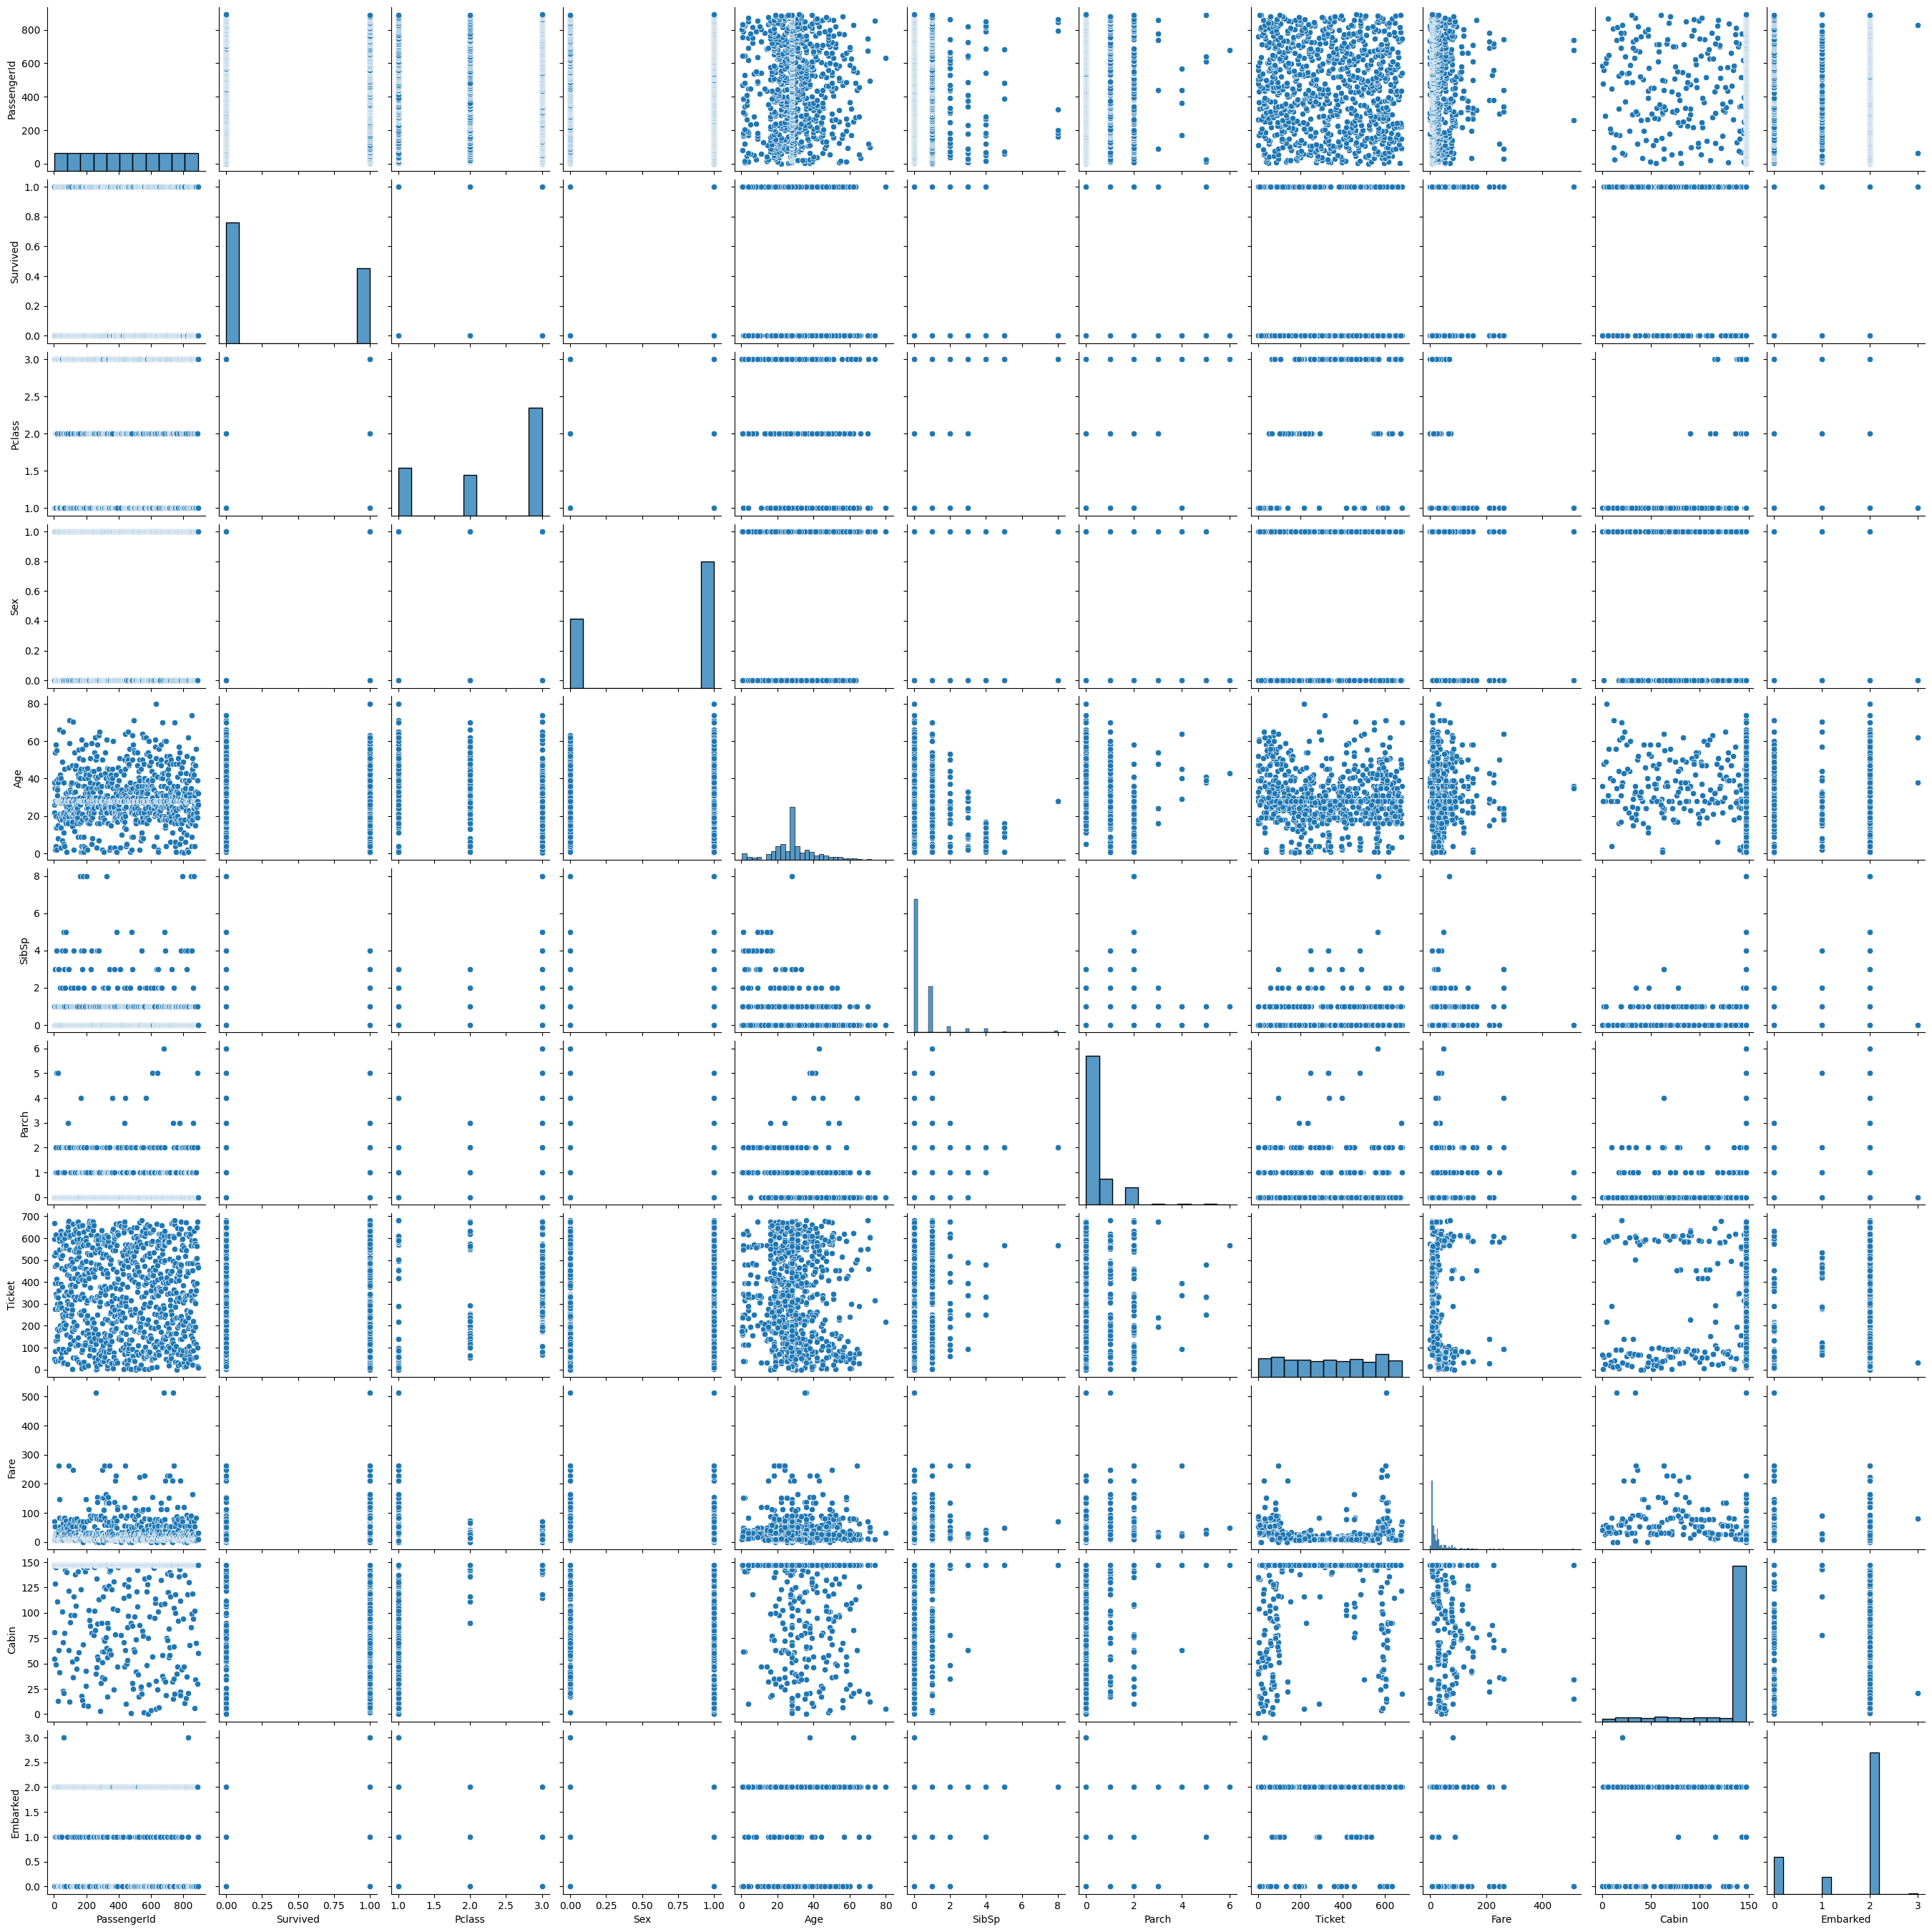

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    int64  
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB


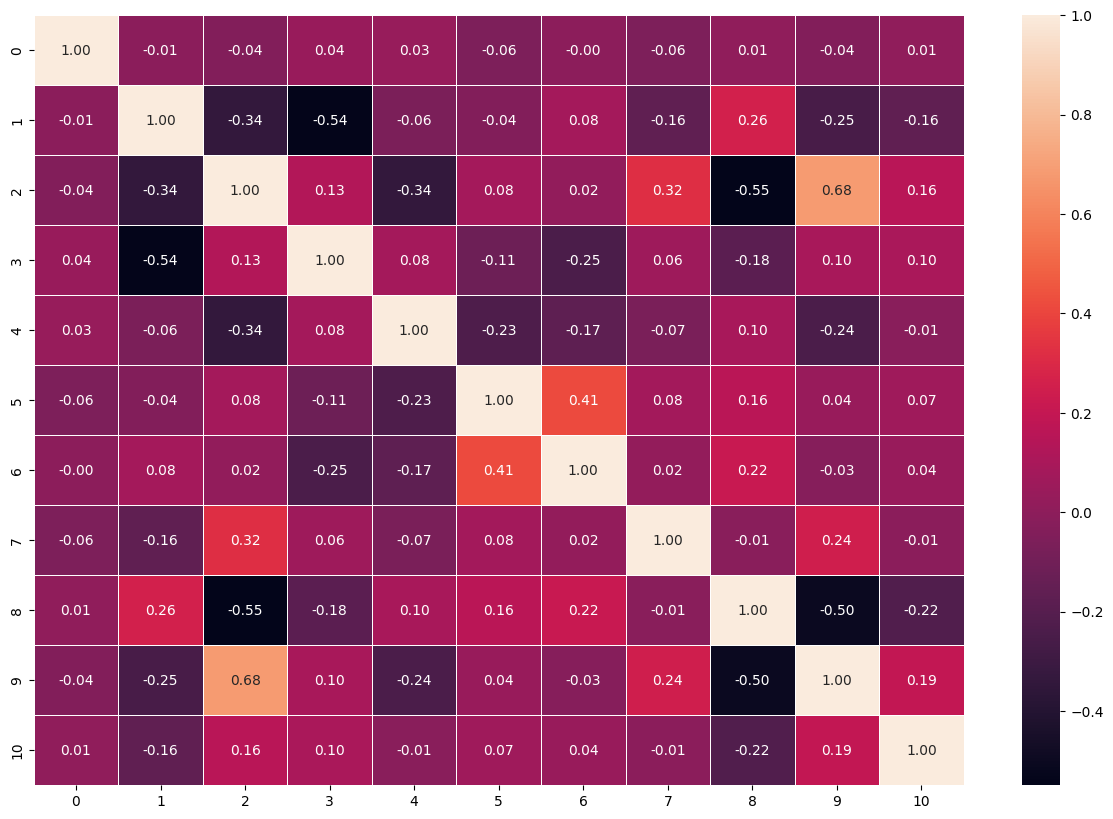

In [12]:
import numpy as np
corr=np.corrcoef(df.values.T)
plt.figure(figsize=(15,10))
hm = sns.heatmap(corr,annot=True, linewidth=0.5,fmt=".2f")
plt.show()

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

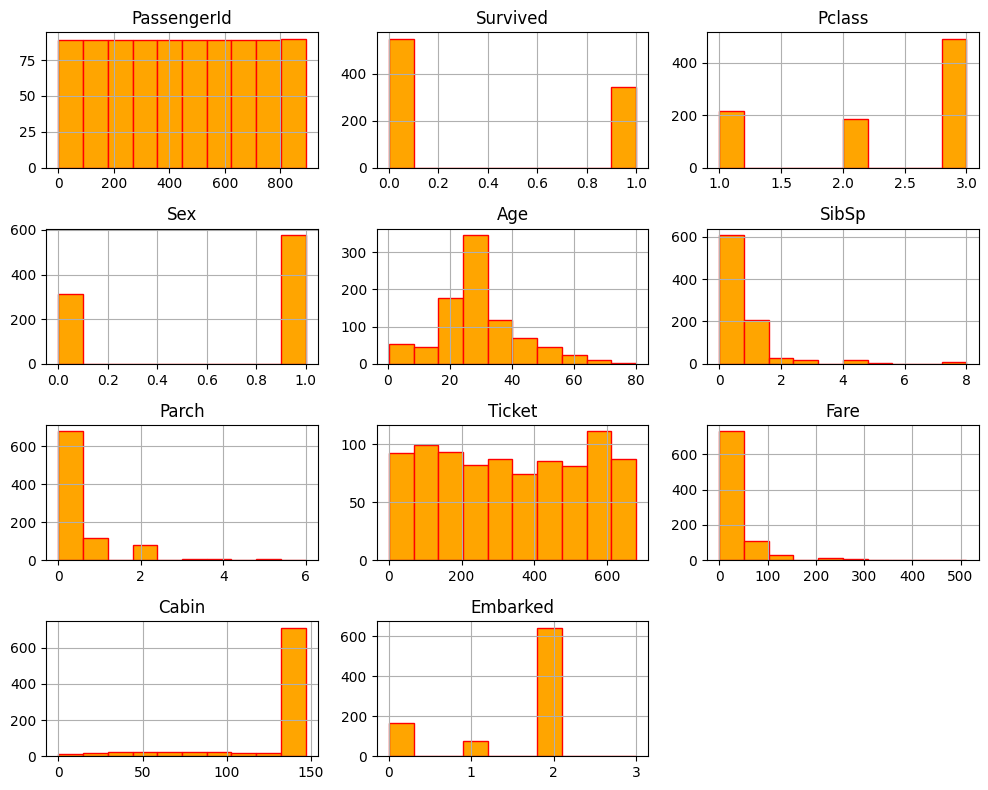

In [14]:
import matplotlib.pyplot as plt
df.hist(figsize=(10, 8), color='orange', edgecolor='red')
plt.tight_layout()
plt.show()

In [15]:
df.drop([ "Ticket", "PassengerId"], axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [17]:
df.shape

(891, 9)

In [18]:
target=df['Survived']
input=df.drop(columns=['Survived'])
input.shape

(891, 8)

In [19]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,130.744108,1.538721
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,36.024237,0.794231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,147.000000,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,147.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,147.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,147.000000,3.000000


In [20]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# dataset_std=sc.fit_transform(df)
# dataset_std=pd.DataFrame(dataset_std)
# print(dataset_std.describe())

In [21]:
# dataset_std.head()

In [22]:
# target=dataset_std[0]
# input=dataset_std.drop(columns=[0])
# input.shape

In [23]:
target.shape

(891,)

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input, target, test_size=0.15)

In [72]:
x_train.shape

(757, 8)

In [73]:
x_test.shape

(134, 8)

In [74]:
y_train.unique()

array([0, 1])

In [75]:
y_train.shape

(757,)

In [76]:
(y_train==0).sum()

460

In [77]:
(y_train==1).sum()

297

In [78]:
(y_train==0).count()
(y_train==1).count()

757

In [79]:
from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(x_train,y_train)
train_pred=p.predict(x_train)
test_pred=p.predict(x_test)

In [80]:
from sklearn.metrics import accuracy_score
per_train_acc = accuracy_score(train_pred,y_train)
per_test_acc = accuracy_score(test_pred,y_test)
print("Training Accuracy: ", per_train_acc)
print("Testing Accuracy: ", per_test_acc)

Training Accuracy:  0.6816380449141347
Testing Accuracy:  0.7014925373134329


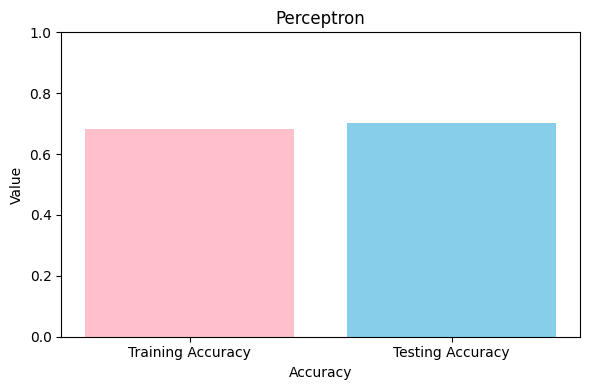

In [81]:
plt.figure(figsize=(6, 4))

x = ['Training Accuracy', 'Testing Accuracy']

y = [per_train_acc, per_test_acc]

plt.bar(x, y, color=['pink', 'skyblue'])

plt.xlabel('Accuracy')
plt.ylabel('Value')
plt.title('Perceptron')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

Confusion Matrix : 
[[339 120]
 [121 177]]


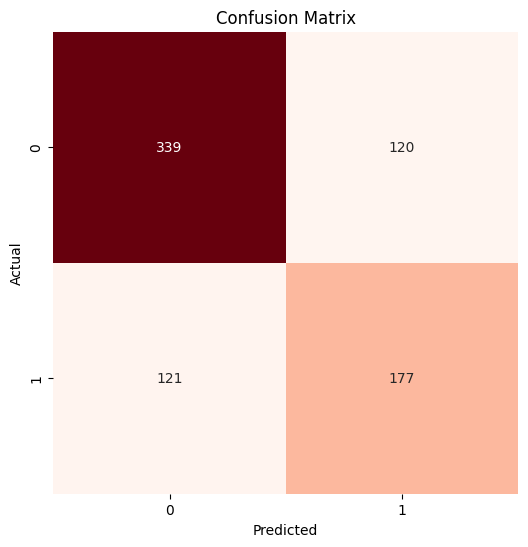

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
print("Confusion Matrix : ")
conf_matrix = confusion_matrix(train_pred, y_train)
print(conf_matrix)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Confusion Matrix : 
[[69 20]
 [20 25]]


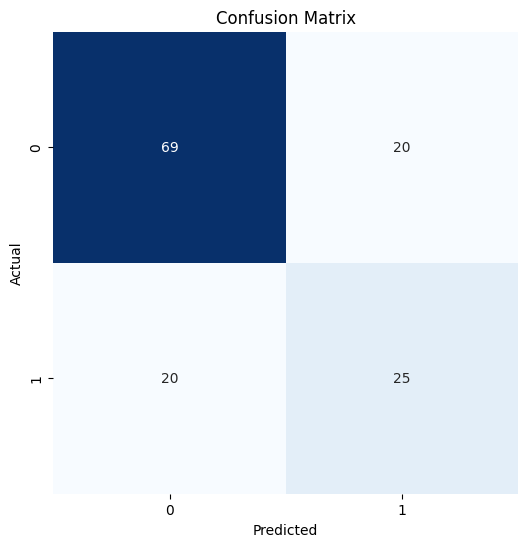

In [83]:
print("Confusion Matrix : ")
conf_matrix_test = confusion_matrix(test_pred, y_test)
print(conf_matrix_test)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(train_pred, y_train)
recall = recall_score(train_pred, y_train)
f1_score = f1_score(train_pred, y_train)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)

Precision:  0.5959595959595959
Recall:  0.5939597315436241
F1 Score:  0.5949579831932773


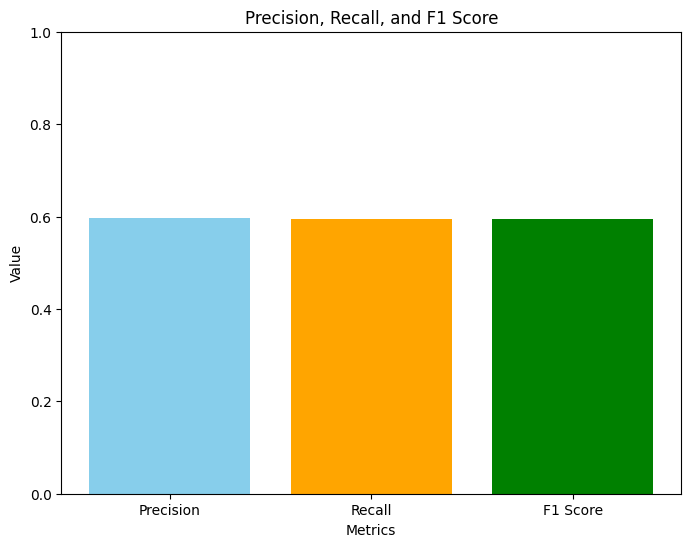

In [85]:
metrics = ['Precision', 'Recall', 'F1 Score']

values = [precision, recall, f1_score]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['skyblue', 'orange', 'green'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Precision, Recall, and F1 Score')
plt.ylim(0, 1)
plt.show()

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
params=[{'penalty':['l1','l2','elasticnet']}, {'alpha':[0.001,0.01,0.1,1]}, {'eta0':[0.001, 0.01, 0.2, 0.5, 0.8]}]

In [88]:
gs=GridSearchCV(estimator=Perceptron(), param_grid=params)

In [89]:
gs.fit(x_train, y_train)

GridSearchCV(estimator=Perceptron(),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet']},
                         {'alpha': [0.001, 0.01, 0.1, 1]},
                         {'eta0': [0.001, 0.01, 0.2, 0.5, 0.8]}])

In [90]:
gs.best_score_

0.6552283025444406

In [91]:
gs.best_params_

{'penalty': 'l1'}

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
lr=LogisticRegression()

In [94]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
lr_train_results=lr.predict(x_train)
lr_test_results=lr.predict(x_test)
lr_train_acc = accuracy_score(lr_train_results, y_train)
lr_test_acc = accuracy_score(lr_test_results, y_test)
print("Training Accuracy : ", lr_train_acc)
print("Testing Accuracy : ", lr_test_acc)

Training Accuracy :  0.797886393659181
Testing Accuracy :  0.7910447761194029


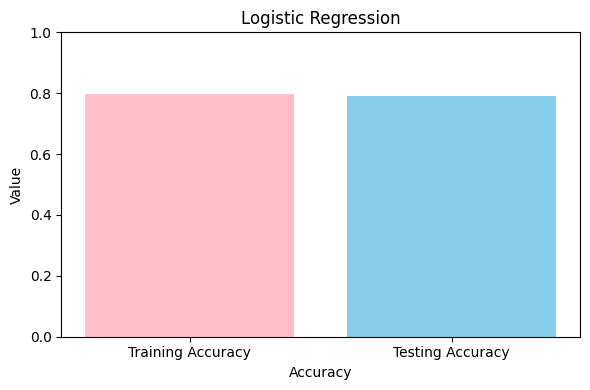

In [96]:
plt.figure(figsize=(6, 4))

x = ['Training Accuracy', 'Testing Accuracy']

y = [lr_train_acc, lr_test_acc]

plt.bar(x, y, color=['pink', 'skyblue'])

plt.xlabel('Accuracy')
plt.ylabel('Value')
plt.title('Logistic Regression')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

In [97]:
from sklearn.svm import SVC
svc=SVC()

In [98]:
svc.fit(x_train, y_train)

SVC()

In [99]:
svc_train_results=svc.predict(x_train)
svc_test_results=svc.predict(x_test)
svc_train_acc = accuracy_score(svc_train_results, y_train)
svc_test_acc = accuracy_score(svc_test_results, y_test)
print("Training Accuracy : ", svc_train_acc)
print("Testing Accuracy : ", svc_test_acc)

Training Accuracy :  0.678996036988111
Testing Accuracy :  0.753731343283582


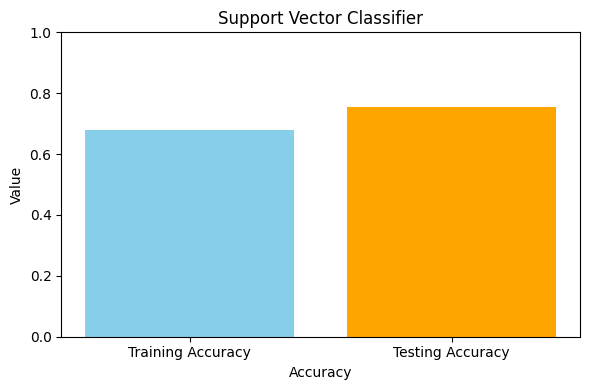

In [100]:
plt.figure(figsize=(6, 4))

x = ['Training Accuracy', 'Testing Accuracy']

y = [svc_train_acc, svc_test_acc]

plt.bar(x, y, color=['skyblue', 'orange'])

plt.xlabel('Accuracy')
plt.ylabel('Value')
plt.title('Support Vector Classifier')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [103]:
knn_train_results = knn.predict(x_train)
knn_test_results = knn.predict(x_test)
knn_train_acc = accuracy_score(knn_train_results, y_train)
knn_test_acc = accuracy_score(knn_test_results, y_test)
print("Training Accuracy : ", knn_train_acc)
print("Testing Accuracy : ", knn_test_acc)

Training Accuracy :  0.808454425363276
Testing Accuracy :  0.7238805970149254


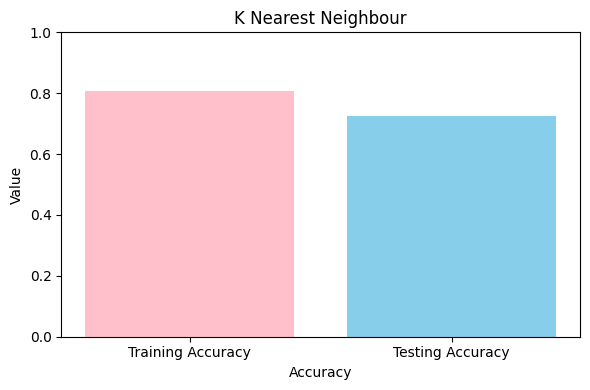

In [104]:
plt.figure(figsize=(6, 4))

x = ['Training Accuracy', 'Testing Accuracy']

y = [knn_train_acc, knn_test_acc]

plt.bar(x, y, color=['pink', 'skyblue'])

plt.xlabel('Accuracy')
plt.ylabel('Value')
plt.title('K Nearest Neighbour')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

In [105]:
knn_params = [{'n_neighbors' : [1,2,3,4,5,6]}]
knn_gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_params)
knn_gs.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6]}])

In [106]:
knn_gs.best_score_

0.7066573719065877

In [107]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth=6)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [108]:
dt_train_results = dt.predict(x_train)
dt_test_results = dt.predict(x_test)
dt_train_acc = accuracy_score(dt_train_results, y_train)
dt_test_acc = accuracy_score(dt_test_results, y_test)
print("Training Accuracy : ", dt_train_acc)
print("Testing Accuracy : ", dt_test_acc)

Training Accuracy :  0.8599735799207398
Testing Accuracy :  0.7686567164179104


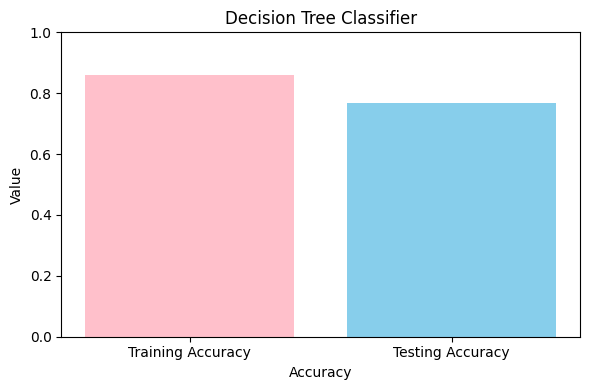

In [109]:
plt.figure(figsize=(6, 4))

x = ['Training Accuracy', 'Testing Accuracy']

y = [dt_train_acc, dt_test_acc]

plt.bar(x, y, color=['pink', 'skyblue'])

plt.xlabel('Accuracy')
plt.ylabel('Value')
plt.title('Decision Tree Classifier')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

In [63]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [64]:
nb_train_results=nb.predict(x_train)
nb_test_results=nb.predict(x_test)
nb_train_acc = accuracy_score(nb_train_results, y_train)
nb_test_acc = accuracy_score(nb_test_results, y_test)
print("Training Accuracy : ", nb_train_acc)
print("Testing Accuracy : ", nb_test_acc)

Training Accuracy :  0.7899603698811096
Testing Accuracy :  0.7388059701492538


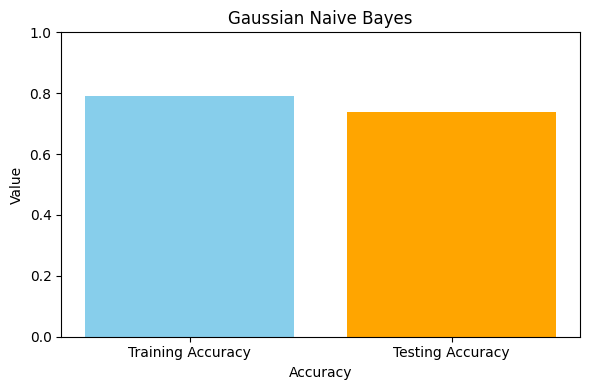

In [65]:
plt.figure(figsize=(6, 4))

x = ['Training Accuracy', 'Testing Accuracy']

y = [nb_train_acc, nb_test_acc]

plt.bar(x, y, color=['skyblue', 'orange'])

plt.xlabel('Accuracy')
plt.ylabel('Value')
plt.title('Gaussian Naive Bayes')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
rf_train_results=rf_classifier.predict(x_train)
rf_test_results=rf_classifier.predict(x_test)
rf_train_acc = accuracy_score(rf_train_results, y_train)
rf_test_acc = accuracy_score(rf_test_results, y_test)
print("Training Accuracy : ", rf_train_acc)
print("Testing Accuracy : ", rf_test_acc)

Training Accuracy :  0.9828269484808454
Testing Accuracy :  0.7910447761194029


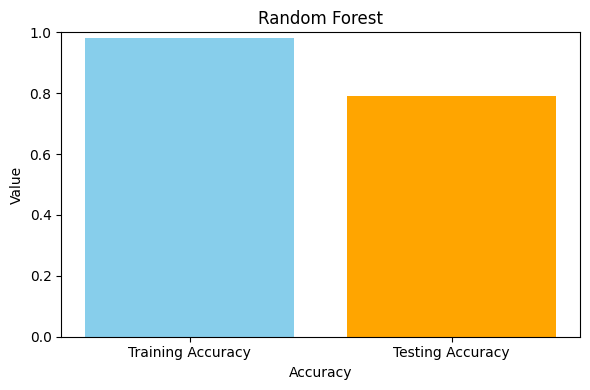

In [69]:
plt.figure(figsize=(6, 4))

x = ['Training Accuracy', 'Testing Accuracy']

y = [rf_train_acc, rf_test_acc]

plt.bar(x, y, color=['skyblue', 'orange'])

plt.xlabel('Accuracy')
plt.ylabel('Value')
plt.title('Random Forest')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Training Accuracy: 0.809775429326288
Logistic Regression Testing Accuracy: 0.7611940298507462
KNN Training Accuracy: 0.8071334214002642
KNN Testing Accuracy: 0.753731343283582
Decision Tree Training Accuracy: 0.8665785997357992
Decision Tree Testing Accuracy: 0.7388059701492538
Random Forest Training Accuracy: 0.9828269484808454
Random Forest Testing Accuracy: 0.7910447761194029


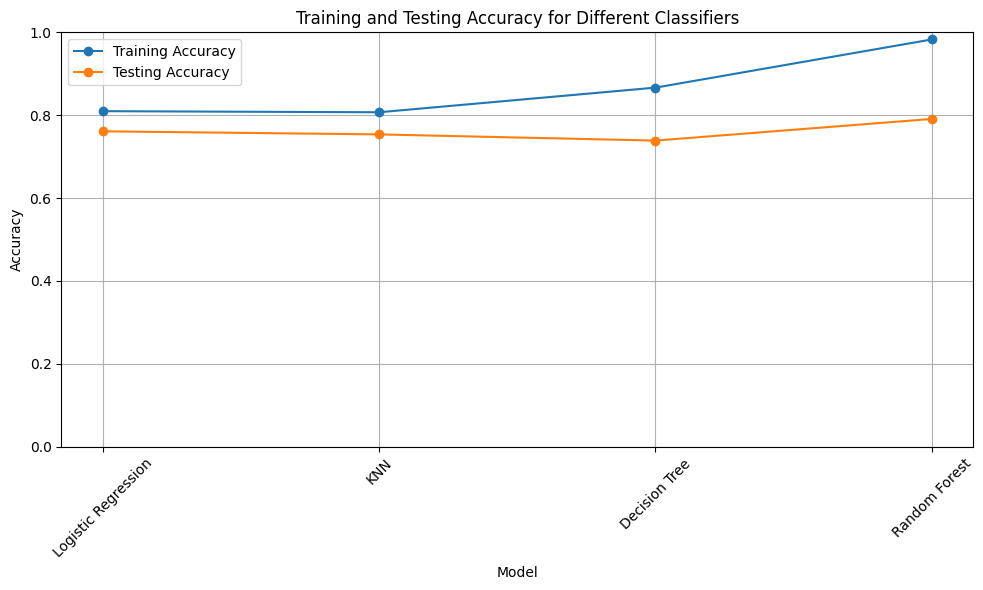

In [70]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    #"Perceptron": Perceptron(),
    "Logistic Regression": LogisticRegression(),
    #"Suport Vector Machine": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=6),
    #"GaussianNB": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

accuracies = {"Training": [], "Testing": []}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    train_accuracy = accuracy_score(train_pred, y_train)
    test_accuracy = accuracy_score(test_pred, y_test)
    accuracies["Training"].append(train_accuracy)
    accuracies["Testing"].append(test_accuracy)
    print(f"{model_name} Training Accuracy: {train_accuracy}")
    print(f"{model_name} Testing Accuracy: {test_accuracy}")

# Plotting the accuracies
plt.figure(figsize=(10, 6))
for dataset, acc in accuracies.items():
    plt.plot(list(models.keys()), acc, marker='o', label=f"{dataset} Accuracy")

plt.title('Training and Testing Accuracy for Different Classifiers')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()